<a href="https://colab.research.google.com/github/suryawahyus/MachineLearning/blob/main/UAS/01_pytorch_workflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 01. PyTorch Workflow Exercise Template

The following is a template for the PyTorch workflow exercises.

It's only starter code and it's your job to fill in the blanks.

Because of the flexibility of PyTorch, there may be more than one way to answer the question.

Don't worry about trying to be *right* just try writing code that suffices the question.

You can see one form of [solutions on GitHub](https://github.com/mrdbourke/pytorch-deep-learning/tree/main/extras/solutions) (but try the exercises below yourself first!).

In [ ]:
# Mengimpor library yang diperlukan
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt


In [ ]:
# Menyiapkan kode yang agnostik perangkat
device = "cuda" if torch.cuda.is_available() else "cpu"


## 1. Create a straight line dataset using the linear regression formula (`weight * X + bias`).
  * Set `weight=0.4` and `bias=0.9` there should be at least 100 datapoints total.
  * Split the data into 80% training, 20% testing.
  * Plot the training and testing data so it becomes visual.

Your output of the below cell should look something like:
```
Jumlah sampel X: 100
Jumlah sampel y: 100
10 sampel X & y pertama:
X: tensor([0.0000, 0.0101, 0.0202, 0.0303, 0.0404, 0.0505, 0.0606, 0.0707, 0.0808,
        0.0909])
y: tensor([0.9000, 0.9040, 0.9081, 0.9121, 0.9162, 0.9202, 0.9242, 0.9283, 0.9323,
        0.9364])
```

Of course the numbers in `X` and `y` may be different but ideally they're created using the linear regression formula.

In [ ]:
# Membuat parameter data
weight = 0.4
bias = 0.9

# Membuat X dan y menggunakan fitur regresi linier
X = torch.linspace(0, 1, 100).reshape(-1, 1)
y = weight * X + bias

# Memecah data menjadi pelatihan dan pengujian
train_size = int(0.8 * len(X))
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

print(f"Jumlah sampel X: {len(X)}")
print(f"Jumlah sampel y: {len(y)}")
print(f"10 sampel X & y pertama:\nX: {X[:10].squeeze()}\ny: {y[:10].squeeze()}")


Jumlah sampel X: 100
Jumlah sampel y: 100
10 sampel X & y pertama:
X: tensor([0.0000, 0.0101, 0.0202, 0.0303, 0.0404, 0.0505, 0.0606, 0.0707, 0.0808,
        0.0909])
y: tensor([0.9000, 0.9040, 0.9081, 0.9121, 0.9162, 0.9202, 0.9242, 0.9283, 0.9323,
        0.9364])


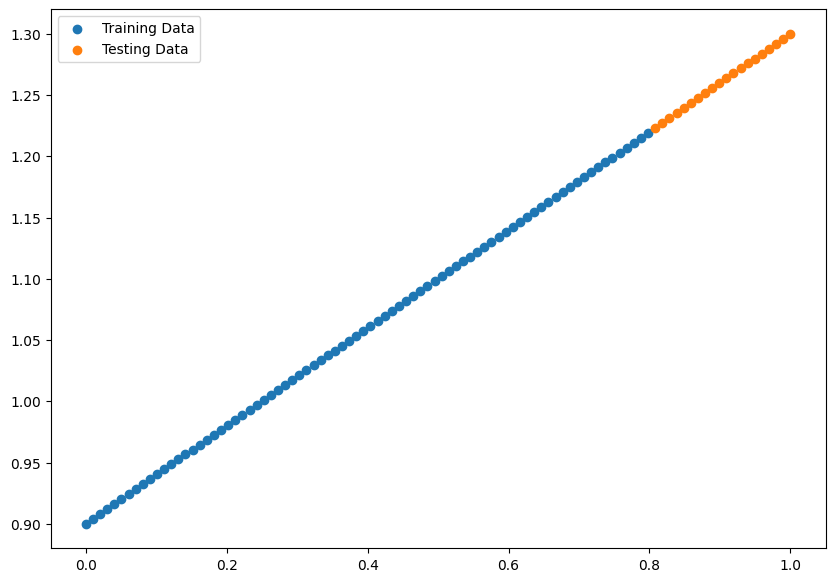

In [ ]:
# Memplot data pelatihan dan pengujian
plt.figure(figsize=(10, 7))
plt.scatter(X_train, y_train, label='Training Data')
plt.scatter(X_test, y_test, label='Testing Data')
plt.legend()
plt.show()


## 2. Build a PyTorch model by subclassing `nn.Module`.
  * Inside should be a randomly initialized `nn.Parameter()` with `requires_grad=True`, one for `weights` and one for `bias`.
  * Implement the `forward()` method to compute the linear regression function you used to create the dataset in 1.
  * Once you've constructed the model, make an instance of it and check its `state_dict()`.
  * **Note:** If you'd like to use `nn.Linear()` instead of `nn.Parameter()` you can.

In [ ]:
# Membuat model regresi linier PyTorch dengan subclassing nn.Module
class LinearRegressionModel(nn.Module):
    def __init__(self):
        super(LinearRegressionModel, self).__init__()
        self.weights = nn.Parameter(torch.randn(1, requires_grad=True))
        self.bias = nn.Parameter(torch.randn(1, requires_grad=True))

    def forward(self, x):
        return self.weights * x + self.bias

# Membuat instansi model dan memindahkannya ke perangkat target
model = LinearRegressionModel().to(device)
print(model.state_dict())


OrderedDict([('weights', tensor([0.1713], device='cuda:0')), ('bias', tensor([-2.4997], device='cuda:0'))])


In [ ]:
# Menginstansiasi model dan memindahkannya ke perangkat target
model = LinearRegressionModel().to(device)
print("Model telah dipindahkan ke:", device)


Model telah dipindahkan ke: cuda


## 3. Create a loss function and optimizer using `nn.L1Loss()` and `torch.optim.SGD(params, lr)` respectively.
  * Set the learning rate of the optimizer to be 0.01 and the parameters to optimize should be the model parameters from the model you created in 2.
  * Write a training loop to perform the appropriate training steps for 300 epochs.
  * The training loop should test the model on the test dataset every 20 epochs.

In [ ]:
# Membuat fungsi loss dan optimizer
loss_function = nn.L1Loss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

# Loop pelatihan
epochs = 300

for epoch in range(epochs):
    # Pelatihan
    model.train()
    y_pred = model(X_train.to(device))
    loss = loss_function(y_pred, y_train.to(device))
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # Pengujian setiap 20 epoch
    if epoch % 20 == 0:
        model.eval()
        with torch.no_grad():
            y_test_pred = model(X_test.to(device))
            test_loss = loss_function(y_test_pred, y_test.to(device))
        print(f"Epoch: {epoch} | Train loss: {loss:.3f} | Test loss: {test_loss:.3f}")


Epoch: 0 | Train loss: 1.332 | Test loss: 1.760
Epoch: 20 | Train loss: 1.100 | Test loss: 1.488
Epoch: 40 | Train loss: 0.868 | Test loss: 1.216
Epoch: 60 | Train loss: 0.636 | Test loss: 0.943
Epoch: 80 | Train loss: 0.404 | Test loss: 0.671
Epoch: 100 | Train loss: 0.174 | Test loss: 0.401
Epoch: 120 | Train loss: 0.086 | Test loss: 0.239
Epoch: 140 | Train loss: 0.072 | Test loss: 0.179
Epoch: 160 | Train loss: 0.065 | Test loss: 0.153
Epoch: 180 | Train loss: 0.058 | Test loss: 0.136
Epoch: 200 | Train loss: 0.051 | Test loss: 0.120
Epoch: 220 | Train loss: 0.044 | Test loss: 0.104
Epoch: 240 | Train loss: 0.037 | Test loss: 0.087
Epoch: 260 | Train loss: 0.030 | Test loss: 0.070
Epoch: 280 | Train loss: 0.023 | Test loss: 0.054


In [ ]:
# Loop pelatihan
epochs = 300

for epoch in range(epochs):
    ### Pelatihan

    # Menempatkan model dalam mode pelatihan
    model.train()

    # 1. Forward pass
    y_pred = model(X_train.to(device))

    # 2. Menghitung loss
    loss = loss_function(y_pred, y_train.to(device))

    # 3. Mengatur ulang gradien menjadi nol
    optimizer.zero_grad()

    # 4. Backpropagation
    loss.backward()

    # 5. Langkah optimizer
    optimizer.step()

    ### Melakukan pengujian setiap 20 epoch
    if epoch % 20 == 0:
        # Menempatkan model dalam mode evaluasi dan mengatur konteks inferensi
        model.eval()
        with torch.no_grad():
            # 1. Forward pass
            y_test_pred = model(X_test.to(device))

            # 2. Menghitung test loss
            test_loss = loss_function(y_test_pred, y_test.to(device))

        # Mencetak apa yang terjadi
        print(f"Epoch: {epoch} | Train loss: {loss.item():.3f} | Test loss: {test_loss.item():.3f}")


Epoch: 0 | Train loss: 0.016 | Test loss: 0.038
Epoch: 20 | Train loss: 0.009 | Test loss: 0.021
Epoch: 40 | Train loss: 0.002 | Test loss: 0.005
Epoch: 60 | Train loss: 0.009 | Test loss: 0.005
Epoch: 80 | Train loss: 0.009 | Test loss: 0.005
Epoch: 100 | Train loss: 0.009 | Test loss: 0.005
Epoch: 120 | Train loss: 0.009 | Test loss: 0.005
Epoch: 140 | Train loss: 0.009 | Test loss: 0.005
Epoch: 160 | Train loss: 0.009 | Test loss: 0.005
Epoch: 180 | Train loss: 0.009 | Test loss: 0.005
Epoch: 200 | Train loss: 0.009 | Test loss: 0.005
Epoch: 220 | Train loss: 0.009 | Test loss: 0.005
Epoch: 240 | Train loss: 0.009 | Test loss: 0.005
Epoch: 260 | Train loss: 0.009 | Test loss: 0.005
Epoch: 280 | Train loss: 0.009 | Test loss: 0.005


## 4. Make predictions with the trained model on the test data.
  * Visualize these predictions against the original training and testing data (**note:** you may need to make sure the predictions are *not* on the GPU if you want to use non-CUDA-enabled libraries such as matplotlib to plot).

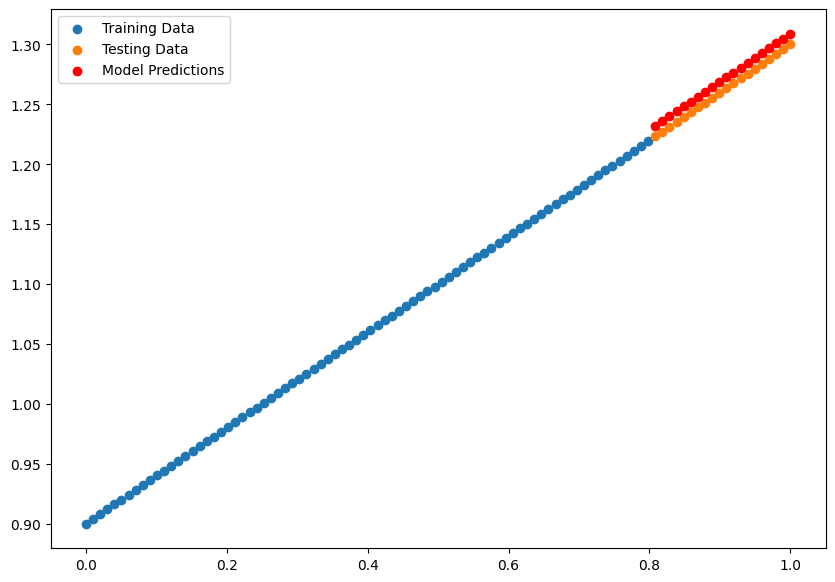

In [ ]:
# Membuat prediksi dengan model
model.eval()
with torch.no_grad():
    y_predictions = model(X_test.to(device))

# Memplot prediksi (ini mungkin perlu ada di perangkat tertentu)
plt.figure(figsize=(10, 7))
plt.scatter(X_train.cpu(), y_train.cpu(), label='Training Data')
plt.scatter(X_test.cpu(), y_test.cpu(), label='Testing Data')
plt.scatter(X_test.cpu(), y_predictions.cpu(), label='Model Predictions', color='red')
plt.legend()
plt.show()


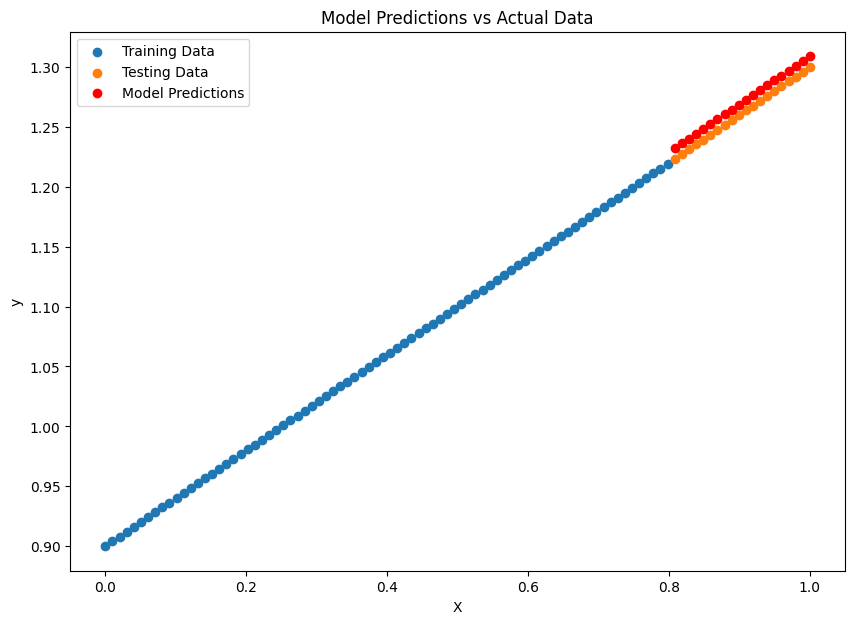

In [ ]:
# Memplot prediksi (pastikan data pada perangkat yang tepat untuk plotting)
plt.figure(figsize=(10, 7))

# Memplot data pelatihan
plt.scatter(X_train.cpu().numpy(), y_train.cpu().numpy(), label='Training Data')

# Memplot data pengujian
plt.scatter(X_test.cpu().numpy(), y_test.cpu().numpy(), label='Testing Data')

# Memplot prediksi model
# Pastikan untuk memindahkan data kembali ke CPU jika diperlukan
y_test_predictions = model(X_test.to(device)).cpu().detach().numpy()
plt.scatter(X_test.cpu().numpy(), y_test_predictions, color='red', label='Model Predictions')

plt.title("Model Predictions vs Actual Data")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()


## 5. Save your trained model's `state_dict()` to file.
  * Create a new instance of your model class you made in 2. and load in the `state_dict()` you just saved to it.
  * Perform predictions on your test data with the loaded model and confirm they match the original model predictions from 4.

In [ ]:
from pathlib import Path

# 1. Membuat direktori model
model_path = Path("models")
model_path.mkdir(parents=True, exist_ok=True)

# 2. Membuat jalur simpan model
model_save_path = model_path / "linear_regression_model.pth"

# 3. Menyimpan state dict model
torch.save(model.state_dict(), model_save_path)

# Membuat instansi model baru dan memuat state dict yang disimpan
loaded_model = LinearRegressionModel().to(device)
loaded_model.load_state_dict(torch.load(model_save_path))

# Membuat prediksi dengan model yang dimuat dan membandingkannya dengan yang sebelumnya
loaded_model.eval()
with torch.no_grad():
    loaded_model_predictions = loaded_model(X_test.to(device))

# Memeriksa apakah prediksi cocok
assert torch.allclose(y_predictions, loaded_model_predictions), "Prediksi tidak cocok"


In [ ]:
# Membuat instansi baru dari model
loaded_model = LinearRegressionModel()

# Memuat state dict yang disimpan ke dalam model baru
model_state_dict = torch.load(model_save_path)
loaded_model.load_state_dict(model_state_dict)

# Memindahkan model yang dimuat ke perangkat target
loaded_model = loaded_model.to(device)
print("Model yang dimuat dipindahkan ke:", device)


Model yang dimuat dipindahkan ke: cuda


In [ ]:
# Membuat prediksi dengan model yang dimuat
loaded_model.eval()
with torch.no_grad():
    loaded_model_predictions = loaded_model(X_test.to(device)).cpu()

# Membandingkan prediksi dengan model sebelumnya
# Pastikan untuk memindahkan prediksi sebelumnya ke CPU jika masih berada di GPU
original_model_predictions = y_predictions.cpu()

# Periksa apakah kedua set prediksi sama
assert torch.allclose(loaded_model_predictions, original_model_predictions, atol=1e-5), "Prediksi tidak cocok"

print("Prediksi dari model yang dimuat cocok dengan prediksi model asli.")


Prediksi dari model yang dimuat cocok dengan prediksi model asli.
